### Extracted Dataset

In [ ]:
!unrar x /content/drive/MyDrive/Project/forest_Dataset.rar /content/drive/MyDrive/Project



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Project/forest_Dataset.rar


Would you like to replace the existing file /content/drive/MyDrive/Project/forest_Dataset/Test/Fire/cl6aniex40000f0559xrzal6j_2_FALSE_COLOR_jpg.rf.c3b6cee2899d5efae138b7e4d9274f24.jpg
 16272 bytes, modified on 2025-06-28 20:46
with a new one
 16272 bytes, modified on 2025-02-19 06:23

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  /content/drive/MyDrive/Project/forest_Dataset/Test/Fire/cl6aniex40000f0559xrzal6j_2_FALSE_COLOR_jpg.rf.c3b6cee2899d5efae138b7e4d9274f24.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Project/forest_Dataset/Test/Fire/cl6aniex40000f0559xrzal6j_4_FALSE_COLOR__URBAN_jpg.rf.f3d153e3628b4ba1fb627fb23d1aaaf5.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Project/forest_Dataset/Test/Fire/cl6aniex40000f0559xrzal6j_6_SWIR_jpg.rf.a3723fc42c06517b0db04889107d9631.jpg       0%  

### Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder


### Loading the Dataset

In [ ]:
base_path = "/content/drive/MyDrive/Project/forest_Dataset"


### Resizing The Image Size

In [ ]:
# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 512

### Using Data Augumentation Techniques

In [ ]:
# ==== DATA AUGMENTATION & LOADING ====
train_datagen = ImageDataGenerator(
    rescale=1./255

)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, "Train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

# Validation generator
val_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_path, "Validation"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Test generator
test_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_path, "Test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 21386 images belonging to 2 classes.
Found 5360 images belonging to 2 classes.
Found 3804 images belonging to 2 classes.


### Create a CNN Model Architecture

In [ ]:
# ==== CNN MODEL ====
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ==== CALLBACKS ====
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_fire_model.h5", save_best_only=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training The Model

In [ ]:
# ==== TRAIN THE MODEL ====
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=5,
    callbacks=[early_stop, checkpoint]
)

# ==== EVALUATE ON TEST DATA ====
loss, accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# ==== SAVE FINAL MODEL ====
model.save("/content/drive/MyDrive/Project/final_forest_fire_cnn_model.h5")
print("✅ Final model saved.")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


### Saving The Model

In [ ]:
# ==== SAVE FINAL MODEL ====
model.save("/content/drive/MyDrive/Project/final_forest_fire_cnn_model.h5")
print("✅ Final model saved.")


✅ Final model saved.


### Evaluate The Model

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")


NameError: name 'model' is not defined

### Confusion Matrix And Classification Report

8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step


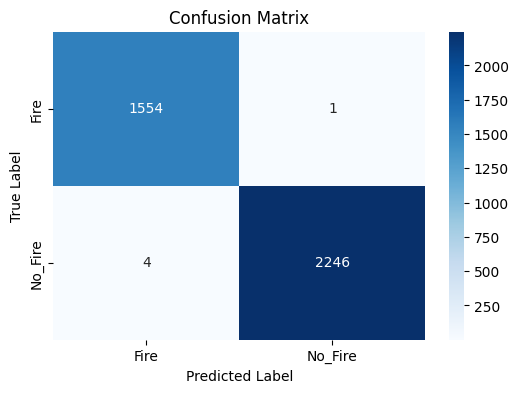

📊 Classification Report:

              precision    recall  f1-score   support

        Fire       1.00      1.00      1.00      1555
     No_Fire       1.00      1.00      1.00      2250

    accuracy                           1.00      3805
   macro avg       1.00      1.00      1.00      3805
weighted avg       1.00      1.00      1.00      3805



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === GET TRUE LABELS AND PREDICTIONS ===
# Predict probabilities
y_pred_probs = model.predict(test_generator)

# Convert to binary predictions (0 or 1)
y_pred = (y_pred_probs >= 0.5).astype(int).reshape(-1)
# True labels
y_true = test_generator.classes

# === CONFUSION MATRIX ===
cm = confusion_matrix(y_true, y_pred)
labels = list(test_generator.class_indices.keys())

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# === CLASSIFICATION REPORT ===
report = classification_report(y_true, y_pred, target_names=labels)
print("📊 Classification Report:\n")
print(report)


### Prediction

Enter the Path: /content/drive/MyDrive/project/Fire/cl6b0czhh000rl4555uf846qc_4_FALSE_COLOR__URBAN_jpg.rf.bdba464d3095e28de4167a10c16b3d7a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


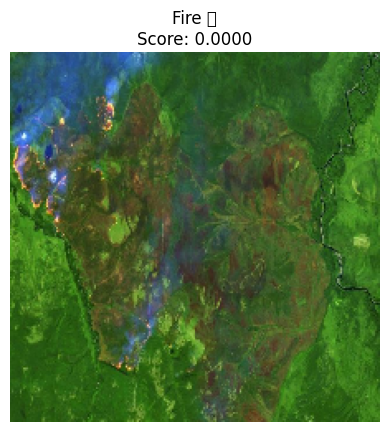

✅ Predicted Label: Fire 🌲
📊 Raw Prediction Score: 0.0000


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# === Load trained model ===
model = tf.keras.models.load_model("/content/drive/MyDrive/Project/final_forest_fire_cnn_model.h5")

# === Set the path to the image you want to test ===
image_path = input("Enter the Path: ")
# === Preprocess the image ===
img = image.load_img(image_path, target_size=(224, 224))  # Resize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Convert to shape (1, 224, 224, 3)
img_array = img_array / 255.0  # Normalize

# === Predict ===
prediction_score = model.predict(img_array)[0][0]

# === Decide label based on prediction score ===
predicted_label = "No Fire 🔥" if prediction_score >= 0.5 else "Fire 🌲"

# === Show the image and result ===
plt.imshow(img)
plt.axis('off')
plt.title(f"{predicted_label}\nScore: {prediction_score:.4f}")
plt.show()

# === Print prediction ===
print(f"✅ Predicted Label: {predicted_label}")
print(f"📊 Raw Prediction Score: {prediction_score:.4f}")


### Creating  a Yolo Model ###

### Installing Libraries

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

### Extracted Datset

In [ ]:
!unzip '/content/drive/MyDrive/Project/COS473 Forest Fires New.v3i.yolov11.zip' -d'/content/drive/MyDrive/Project'

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Project/valid/images/cl6ctje2500hsl4550fuvht4f_1_TRUE_COLOR_jpg.rf.b665dba73732b0f09c6eab79a6ba2fb3.jpg  
 extracting: /content/drive/MyDrive/Project/valid/images/cl6ctje2500hsl4550fuvht4f_1_TRUE_COLOR_jpg.rf.fb5e0e5d8b8544fda9cf16c7617d2d54.jpg  
 extracting: /content/drive/MyDrive/Project/valid/images/cl6ctje2500hsl4550fuvht4f_6_SWIR_jpg.rf.a82051fcdbee9b3a549988b37fd1a8eb.jpg  
 extracting: /content/drive/MyDrive/Project/valid/images/cl6ctjyc600hul455hxis4621_2_FALSE_COLOR_jpg.rf.ed0f758597c3655ad15c110bde511ec5.jpg  
 extracting: /content/drive/MyDrive/Project/valid/images/cl6ctjyc600hul455hxis4621_2_FALSE_COLOR_jpg.rf.f0fd0a50914b2cc3325ded524504216c.jpg  
 extracting: /content/drive/MyDrive/Project/valid/images/cl6ctjyc600hul455hxis4621_4_FALSE_COLOR__URBAN_jpg.rf.5ad7dc24ac801a99ee7779ee5d6d30c6.jpg  
 extracting: /content/drive/MyDrive/Project/valid/images/cl6ctjyc600hul455hxis4621_4_FALSE_CO

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


### Creating Yolo v11 Model

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model=YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 60.9MB/s]


### Training The Model

In [ ]:
model.train(data="/content/drive/MyDrive/Project/data.yaml",epochs=150,batch=64,imgsz=640)

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/kolkata_forest_fire_detection/yolo dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/project/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overla

RuntimeError: Dataset '/content/drive/MyDrive/kolkata_forest_fire_detection/yolo dataset/data.yaml' error ❌ '/content/drive/MyDrive/kolkata_forest_fire_detection/yolo dataset/data.yaml' does not exist

In [ ]:
from ultralytics import YOLO

# Load model from Google Drive checkpoint
model = YOLO("/content/drive/MyDrive/Project/last.pt")

# Train and save results in Google Drive
model.train(
    data="/content/drive/MyDrive/Project/data.yaml",  # dataset configuration
    epochs=150,  # continue training for 150 epochs
    batch=64,  # batch size
    imgsz=640,  # image size
    device=0,  # GPU device 0 (use 0 for CUDA, 0 or "cpu" for CPU)
    resume=True,  # resume from the last checkpoint (last.pt)

    # Save the training output in Google Drive
    project="/content/drive/MyDrive/Project/data.yaml/yolo_saved_runs",  # path in Google Drive
    name="fire_detection_resume_run"  # Folder name for the current training session
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/kolkata_forest_fire_detection/yolo dataset/runs50 epoch/detect/train5/weights/last.pt'

### Need to save last.pt for resume the epoch

In [ ]:
from ultralytics import YOLO

# Load model from Google Drive checkpoint
model = YOLO("/content/drive/MyDrive/Project/last.pt")

# Train and save results in Google Drive
model.train(
    data="/content/drive/MyDrive/Project/data.yaml",  # dataset configuration
    epochs=150,  # continue training for 150 epochs
    batch=64,  # batch size
    imgsz=640,  # image size
    device=0,  # GPU device 0 (use 0 for CUDA, 0 or "cpu" for CPU)
    resume=True,  # resume from the last checkpoint (last.pt)

    # Save the training output in Google Drive
    project="/content/drive/MyDrive/Project/data.yaml/yolo_saved_runs",  # path in Google Drive
    name="fire_detection_resume_run"  # Folder name for the current training session
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/kolkata_forest_fire_detection/runs/detect/train5/weights/last.pt'

### Creating zip file to Save the best.pt and last.pt model

In [ ]:
!zip -r /content/drive/MyDrive/Project/runs.zip runs/


zip I/O error: No such file or directory
zip error: Could not create output file (/content/drive/MyDrive/kolkata_forest_fire_detection/runs.zip)


### Saving The Model

In [ ]:
!unzip '/content/drive/MyDrive/Project/runs.zip' -d /content/drive/MyDrive/Project


unzip:  cannot find or open /content/drive/MyDrive/kolkata_forest_fire_detection/runs.zip, /content/drive/MyDrive/kolkata_forest_fire_detection/runs.zip.zip or /content/drive/MyDrive/kolkata_forest_fire_detection/runs.zip.ZIP.


In [ ]:
from ultralytics import YOLO

!yolo task=detect mode=val model='/content/drive/MyDrive/Project/best.pt' data='/content/drive/MyDrive/Project/data.yaml'


Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
100% 755k/755k [00:00<00:00, 22.9MB/s]
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 4.0±2.9 MB/s, size: 21.8 KB)
val: Scanning /content/drive/MyDrive/Project/valid/labels... 3110 images, 0 backgrounds, 0 corrupt: 100% 3110/3110 [01:01<00:00, 50.90it/s] 
val: /content/drive/MyDrive/Project/valid/images/cl6od1qhh0014ao55hlfact4a_6_SWIR_jpg.rf.4de8e8f1fdb648ebe7c2cf8171ad5f51.jpg: 1 duplicate labels removed
val: New cache created: /content/drive/MyDrive/Project/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10% 19/195 [01:09<10:43,  3.66s/it]
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 983, in

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Project/best.pt conf=0.70 source="/content/drive/MyDrive/Project/test/images"


Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1555 /content/drive/MyDrive/Project/test/images/cl6aniex40000f0559xrzal6j_2_FALSE_COLOR_jpg.rf.c3b6cee2899d5efae138b7e4d9274f24.jpg: 640x640 1 Fire, 144.6ms
image 2/1555 /content/drive/MyDrive/Project/test/images/cl6aniex40000f0559xrzal6j_4_FALSE_COLOR__URBAN_jpg.rf.f3d153e3628b4ba1fb627fb23d1aaaf5.jpg: 640x640 (no detections), 138.0ms
image 3/1555 /content/drive/MyDrive/Project/test/images/cl6aniex40000f0559xrzal6j_6_SWIR_jpg.rf.a3723fc42c06517b0db04889107d9631.jpg: 640x640 1 Fire, 129.1ms
image 4/1555 /content/drive/MyDrive/Project/test/images/cl6anjur50001f055bzb494if_2_FALSE_COLOR_jpg.rf.88f908d40a6bb5410fcf0896347b1c27.jpg: 640x640 2 Fires, 128.8ms
image 5/1555 /content/drive/MyDrive/Project/test/images/cl6anjur50001f055bzb494if_4_FALSE_COLOR__URBAN_jpg.rf.a16fe6025d143155bca101844fac4eda.jpg: 640x640 (no detections)

### Prediction

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 134.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 122.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

Enter the Path: /content/drive/MyDrive/Project/test images/Fire/cl6azgmfw0004f0557iqa1usw_6_SWIR_jpg.rf.9ea6aa12bd053739fa1d533050d2d4a3.jpg

image 1/1 /content/drive/MyDrive/Project/test images/Fire/cl6azgmfw0004f0557iqa1usw_6_SWIR_jpg.rf.9ea6aa12bd053739fa1d533050d2d4a3.jpg: 640x640 1 Fire, 148.5ms
Speed: 2.3ms preprocess, 148.5ms inference, 17.6ms postprocess per image at shape (1, 3, 640, 640)


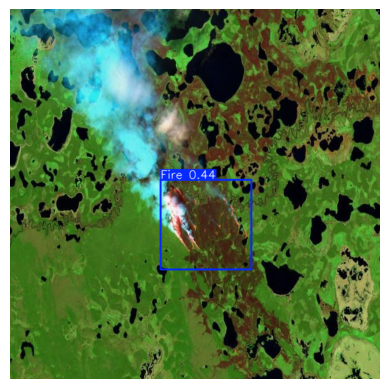

In [ ]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO('/content/drive/MyDrive/Project/best.pt')

# Run prediction
results = model(input("Enter the Path: "))

# Annotate and convert BGR to RGB
annotated_image = results[0].plot()
annotated_image = annotated_image[..., ::-1]  # Convert BGR to RGB

# Display
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
